<center><img src="https://www.cardrates.com/wp-content/uploads/2020/08/shutterstock_576998230.jpg"></center><br>

# Detectando Fraudes de Cartão de Crédito com Machine Learning

# Introdução<br>
Com o avanço do acesso a Internet e a popularização dos *smartphones*, cada vez mais as pessoas utilizam seus cartões de crédito para realizar compras em lojas online, aplicativos e afins.<br><br>
Em um cenário como este, é de se esperar que, infelizmente, algumas pessoas mal-intencionadas busquem meios para fraudar cartões de crédito e realizar compras no nome - e com o dinheiro - de outras pessoas.<br><br>
Para **evitar** que clientes sejam cobrados por compras que não foram feitas por eles, é muito importante que bancos e empresas de cartão de crédito sejam capazes de reconhecer quando determinada transação é fruto de fraude ou não.<br><br>
Neste projeto, utilizarei algoritmos de **machine learning** para treinar um modelo preditivo que seja capaz de aprender e detectar quando uma transação for fraudulenta ou não. Utilizarei os classificadores **Decision Tree**, **Random Forest**, **Ada Boost** e **Gradient Boosting** da biblioteca **Scikit-Learn** para identificar qual dentre estes quatro algoritmos se encaixa melhor em nosso conjunto de dados e produz os melhores resultados de acordo com as métricas de avaliação dos modelos.

# Importando Bibliotecas

In [1]:
# Bibliotecas para exploração, análise e visualização dos dados
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Biblioteca de pré-processamento de dados do SKlearn
from sklearn.preprocessing import StandardScaler
# train_test_split para separar os dados em conjuntos de teste e treinamento
from sklearn.model_selection import train_test_split
# Métricas de avaliação dos modelos
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Algoritmos
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# Configurando seaborn
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

# Obtendo Dados

In [3]:
# Importando dados
df = pd.read_csv('creditcard.csv')
# Visualizando dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Conhecendo o Dataset<br>

Os dados acima foram retirados do dataset <a href= "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a> postado no Kaggle e que contém transações de cartões de crédito realizadas em Setembro de 2013 por clientes europeus durante dois dias.<br><br>
O dataset possui as variáveis **time**, que registra os segundos que se passaram entre cada transação e a **primeira transação** do dataset, enquanto **amount** registra o valor em Euros da transação e, por fim, a variável **class**, que registra se aquela transação é fraudulenta ou não, onde **1 = fraude** e **0 = genuína**.<br><br>
As variáveis V1,V2,V3...V28 sofreram transformações de <a href = "https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais">análise de componentes principais</a> e não tiveram seu conteúdo informado, devida a alta confidencialidade de suas informações.<br><br>

In [4]:
# Verificando os tipos de dados presentes no dataset
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

O dataset contém apenas atributos **numéricos**, sendo em sua grande maioria números com ponto flutuante (*float*) e apenas a variável **class** apresenta números inteiros (*int*)

In [5]:
# Verificndo se há dados nulos no dataset
df.isna().values.any()

False

In [6]:
# Dados estatísticos acerca dos valores de transação
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

75% das transações registradas no período foram de **até** €77,16.<br><br>
O **valor máximo** registrado no período foi de €25.691,16. Bem acima da **média** de €88,35.

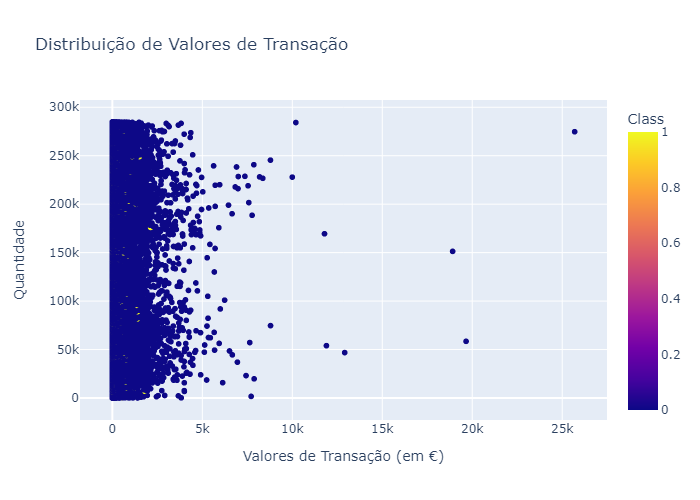

In [7]:
# Visualizando a distribuição dos valores de transação
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribuição de Valores de Transação')
fig.update_layout(xaxis_title='Valores de Transação (em €)',
                    yaxis_title='Quantidade')
fig.show("png")

Aparentemente, a maioria das transações do *datset* são genuínas, como podemos observar no gráfico acima, representadas pelos **pontos azuis**. Além disto, podemos ver que os valores mais altos de transações não foram fraudalentos e que não houve fraude de nenhuma transação **acima de €5.000,00**.<br><br>
Entretanto, parece ser difícil identificar no gráfico as transções fraudulentas, que estão representadas por **pontos amarelos**. Isso nos deixa com uma dúvida: **Quantas transações foram de fato fraude?**

# Distribuição de Classes

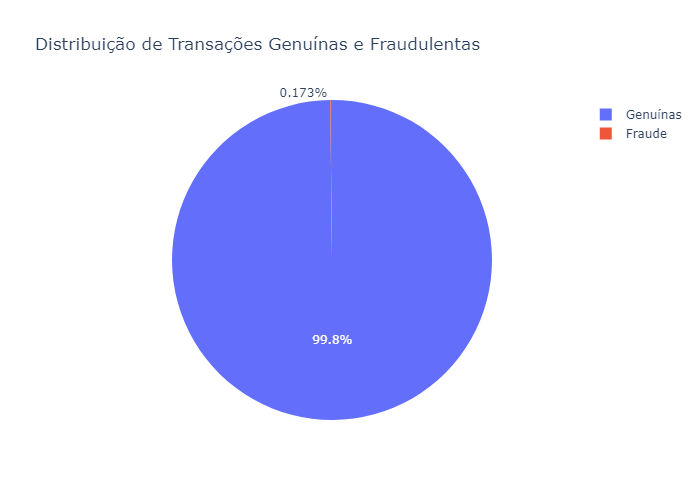

In [12]:
# Visualizing Class distribution
fig = px.pie(df.Class,values = df.Class.value_counts(),
             names=['Genuínas', 'Fraude'], title='Distribuição de Transações Genuínas e Fraudulentas')
fig.show('png')

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Parece que **apenas 492** transações do *dataset* foram fraudulentas, o que representa **0,17%** dos dados. Existe um enorme **desbalanceamento de classe** para lidarmos neste proejto!<br><br>
Vamos ver algumas estatísticas a respeito dos valores das transações fraudulentas.

In [10]:
df.query("Class ==1").Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

75% das fraudes foram **abaixo** do valor de **€105,89** e o maior valor registrado de fraude foi de €2.125,87. Vamos ver estes valores distribuídos em um gráfico!

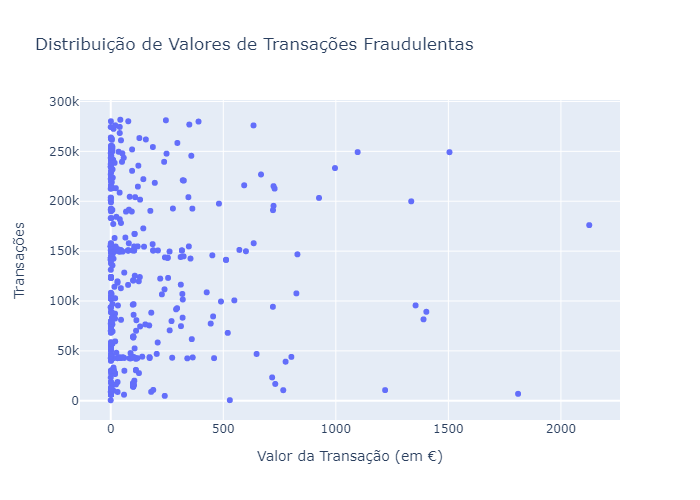

In [13]:
# Distribuição de valores de transações fraudulentas
fig = px.scatter(df.query("Class==1"), x = 'Amount', y =df.query("Class==1").index,
                title = 'Distribuição de Valores de Transações Fraudulentas')
fig.update_layout(xaxis_title='Valor da Transação (em €)',
                    yaxis_title='Transações')
fig.show('png')

# Preparando Dados

Neste projeto, não usaremos o atributo **time**, portanto, podemo removê-lo do dataframe.<br><br>
Também usaremos o método StandardScaler() para deixar os dados registrados no atributo **amount** em uma escala similar a dos outros atributos, evitando que nosso modelos atribuam um peso maior a esta variável. 

In [14]:
df = df.drop(columns = ['Time'], axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Vamos agora dividir nosso dataset em **variáveis independentes (X)** e **variável dependente (y)**.

In [15]:
X = df.drop(columns=['Class'], axis=1)
y = df.Class

In [16]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [17]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


Agora vamos dividir nossos dados em **conjunto de treino** e **conjunto de teste**. Irei dividi-los em uma proporção 70/30, deixando 30% dos dados para teste do modelo.

In [18]:
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size= .3, random_state = 123)

In [20]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (199364, 29)
X Test size:  (85443, 29)
X Test proportion  30%


In [21]:
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

Y Train size:  (199364,)
Y Test size:  (85443,)
Y Test proportion  30%


Normalizando o atributo **amount** com StandardScaler()<br><br>
É importante realizar essa normalização separadamente no conjunto de teste e no conjunto de treino, evitando assim o efeito de **data leakage**, quando nosso algoritmo recebe informações privilegiadas advindas do conjunto de treino, o que pode ocasionar em métricas de performance inflacionadas.

In [22]:
# Normalizando dados no dataset de treino
scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))
train_x

C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_560\3733734648.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9057,1.223528,0.726064,-0.192303,1.315143,0.327134,-0.627426,0.103793,-0.166424,0.941614,-0.755328,...,-0.117242,-0.168107,-0.192579,-0.161883,-0.158105,0.687808,-0.363874,0.001551,0.030803,-0.350266
197407,-1.531257,-0.845410,-0.661207,-0.010479,2.096034,-1.582374,0.644661,-0.146939,0.305072,-0.877905,...,-0.256196,-0.425386,-0.558420,1.625851,0.490823,0.165614,-0.613079,0.388003,-0.082430,-0.314286
257714,2.302551,-1.410263,-1.301974,-1.825564,-0.774062,0.000869,-1.163464,-0.018924,-1.428129,1.749254,...,-0.390696,-0.164472,-0.037426,0.172886,0.066635,-0.104352,-0.174764,-0.003206,-0.060548,-0.274222
201302,1.809691,0.232969,0.312680,3.745688,-0.357230,0.337521,-0.547228,0.286964,-0.538232,1.574565,...,-0.340672,-0.152481,-0.534599,0.448150,-0.047445,-0.652783,-0.402664,-0.002607,-0.035744,-0.314286
167965,-2.449361,2.602426,-2.648017,0.169754,-0.043874,-1.789616,-0.259222,1.078845,-0.559213,-1.896160,...,-0.729064,0.476948,0.868659,0.003451,-0.202979,-0.444781,-0.232060,-1.115661,-0.025988,-0.350266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.027016,0.011921,0.910736,...,-0.011516,0.523933,1.560949,0.059730,0.131521,-0.145999,0.012917,0.012268,-0.054809,-0.264256
17730,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,-0.619047,...,0.177503,-0.090529,-0.491079,-0.179921,1.004741,0.317712,0.281484,0.153761,0.062423,-0.330295
28030,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,0.661338,...,-0.212507,-0.048241,-0.201293,0.053427,0.027638,0.321256,-0.042526,0.001532,0.021002,-0.306281
277869,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,-0.200477,0.678971,-0.775364,...,0.276758,-0.100809,-0.465458,-0.063594,-0.580315,-0.080220,-0.101500,-0.043508,-0.001004,0.462086


In [23]:
# Normalizando dados no dataset de teste
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))
test_x

C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_560\2044644599.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
73129,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,-0.283034,...,-0.066304,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,-0.151402
229597,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,0.705357,...,0.124636,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,-0.119496
220218,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,-0.181429,...,0.173336,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,0.438859
198374,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,1.171678,...,-0.350968,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,-0.023778
167980,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,1.014140,...,0.176958,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,0.023084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64823,0.981634,-0.013797,0.702670,1.179459,0.141590,1.295216,-0.350124,0.487122,0.426048,-0.362567,...,-0.289286,-0.111793,0.008747,0.192576,-0.639571,0.165878,-0.418655,0.110630,0.016445,-0.312328
144933,-0.188338,0.753188,0.535544,-0.242559,0.103888,-0.044430,0.423675,0.077219,0.369646,-0.980602,...,-0.078595,0.339947,1.167204,-0.185061,-0.401266,-0.765919,-0.238929,0.166404,0.236026,-0.176369
31407,-0.959696,0.736918,1.722280,0.265029,0.769584,-0.443858,0.885135,-0.035855,-0.407058,-0.869518,...,0.003919,-0.074657,-0.200209,-0.376018,-0.108290,0.847200,-0.397175,0.026365,0.062753,-0.259524
28343,1.293597,-0.527259,0.659631,-0.775476,-0.962009,-0.355633,-0.699761,0.061105,-1.084533,0.719309,...,0.071060,0.002715,-0.111126,0.167429,0.206325,0.109294,-0.481575,0.024369,0.012776,-0.290991


Considerando que estamos lidando com **dados desbalanceados**, precisamos utilizar o **SMOTE** para usarmos uma técnica de **oversampling** dos dados.<br><br>
Isto irá gerar, de forma sintética, mais amostras de transações fraudulentas através daquelas que já existem no dataset original.

In [24]:
y.value_counts() # 0 = Transações genuínas | 1 = Fraudes

0    284315
1       492
Name: Class, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y) # Fazendo oversampling

In [26]:
train_y.value_counts()

0    199032
1    199032
Name: Class, dtype: int64

Agora nós estamos uma proporção de 50 | 50 entre transações fraudulentas e genuínas.<br><br>

**Nota:** Eu apenas apliquei o SMOTE nos **dados de treinamento**, enquanto mantive o desbalanceamento no conjunto de teste. Eu fiz isso, pois o conjunto de teste deve ser uma representação fiel da realidade!

## Aplicando os Algoritmos

In [27]:
# Random Forest Classifier 
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(train_x,train_y)

y_predictions_rf = random_forest.predict(test_x)

# Decision Tree Classifier 
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(train_x,train_y)

y_predictions_dt = decision_tree.predict(test_x)

# Ada Boost Classifier 
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(train_x,train_y)

y_predictions_ab = ada_boost.predict(test_x)

# Gradient Boosting Classifier 
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_y)

y_prediction_gb = gradient_boosting.predict(test_x)

## Resultados: Random Forest

In [28]:
# Métricas de avaliação Random Forest
metrics = [['Acurácia',(accuracy_score(test_y, y_predictions_rf))],
                         ['Precision',precision_score(test_y, y_predictions_rf)],
                         ['Recall', recall_score(test_y, y_predictions_rf)],
                         ['F1_score',f1_score(test_y, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Métricas', 'Resultados'])
metrics_df

,Métricas,Resultados
0,Acurácia,0.999473
1,Precision,0.880795
2,Recall,0.831250
3,F1_score,0.855305


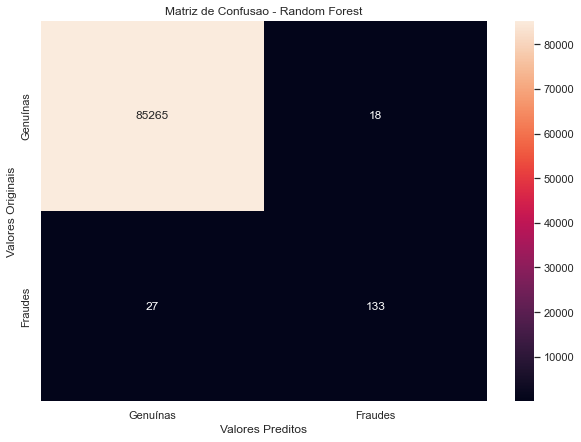

In [29]:
# Matriz de Confusão Random Forest
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Random Forest')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

# Decision Tree Scores

In [30]:
# Métricas de avaliação Decision Tree
metrics_df = [['Acurácia',(accuracy_score(test_y, y_predictions_dt))],
                         ['Precision',precision_score(test_y, y_predictions_dt)],
                         ['Recall', recall_score(test_y, y_predictions_dt)],
                         ['F1_score',f1_score(test_y, y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Métricas', 'Resultados'])
metrics_df_dt

,Métricas,Resultados
0,Acurácia,0.996828
1,Precision,0.347107
2,Recall,0.787500
3,F1_score,0.481836


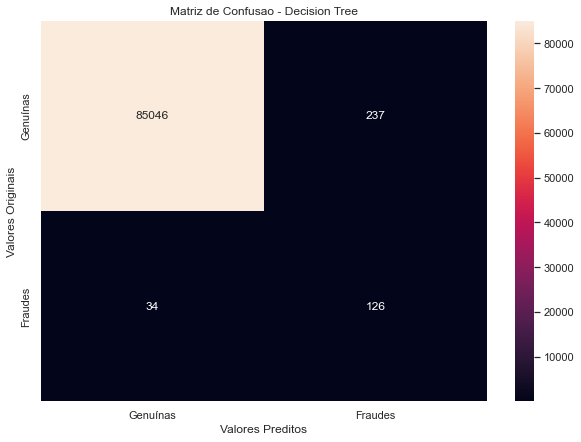

In [31]:
# Matriz de Confusão Decision Tree
confusion_matrix_dt = confusion_matrix(test_y, y_predictions_dt)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Decision Tree')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

# Ada Boost Scores

In [32]:
# Métricas de avaliação Ada Boost
metrics_ab = [['Acurácia',(accuracy_score(test_y, y_predictions_ab))],
                         ['Precision',precision_score(test_y, y_predictions_ab)],
                         ['Recall', recall_score(test_y, y_predictions_ab)],
                         ['F1_score',f1_score(test_y, y_predictions_ab)]]
metrics_df_ab = pd.DataFrame(metrics_ab, columns = ['Métricas', 'Resultados'])
metrics_df_ab

,Métricas,Resultados
0,Acurácia,0.984528
1,Precision,0.099862
2,Recall,0.906250
3,F1_score,0.179901


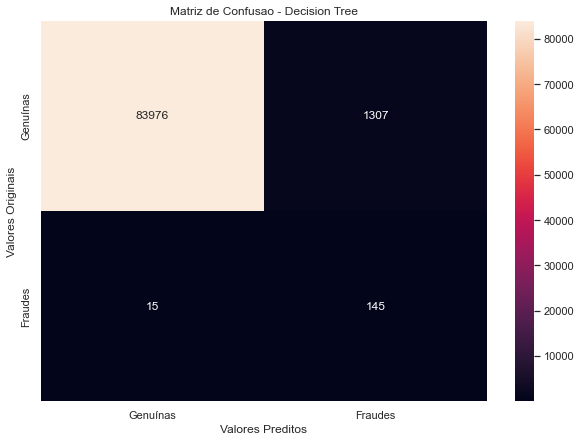

In [33]:
# Matriz de Confusão Ada Boost
confusion_matrix_ab = confusion_matrix(test_y, y_predictions_ab)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Decision Tree')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

# Gradient Boosting Scores

In [34]:
# Métricas de avaliação Gradient Boosting
metrics_gb = [['Acurácia',(accuracy_score(test_y, y_prediction_gb))],
                         ['Precision',precision_score(test_y, y_prediction_gb)],
                         ['Recall', recall_score(test_y, y_prediction_gb)],
                         ['F1_score',f1_score(test_y, y_prediction_gb)]]
metrics_df_gb = pd.DataFrame(metrics_gb, columns = ['Métricas', 'Resultados'])
metrics_df_gb

,Métricas,Resultados
0,Acurácia,0.987524
1,Precision,0.120603
2,Recall,0.900000
3,F1_score,0.212703


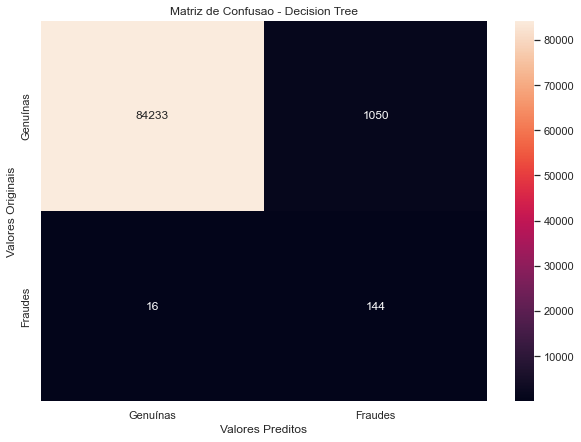

In [35]:
# Matriz de Confusão Gradient Boosting
confusion_matrix_gb = confusion_matrix(test_y, y_prediction_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Decision Tree')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

In [36]:
# Contando o número de transações genuínas e fraudulentas existem no conjunto de teste
test_y.value_counts()

0    85283
1      160
Name: Class, dtype: int64

Considerando que temos **160 transações fraudulentas** no conjunto de teste, e que o nosso objetivo é **prever transações fraudulentas**, podemos perceber que o modelo que melhor cumpriu este objetivo foi o **Ada Boost**, que previu corretamente **145 transações fraudulentas de 160**, com um **recall de 90.60%**, o maior dentre todos os modelos testados.

In [37]:
# ROC AUC Scores
from sklearn.metrics import roc_auc_score
print('Random Forest ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_rf) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_dt) *100).round(2))
print('Ada Boost ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_ab) * 100).round(2))
print('Gradient Boost ROC AUC Score: ', (roc_auc_score(test_y, y_prediction_gb) * 100).round(2))

Random Forest ROC AUC Score:  91.55
Decision Tree ROC AUC Score:  89.24
Ada Boost ROC AUC Score:  94.55
Gradient Boost ROC AUC Score:  94.38


# Conclusão

Quando trabalhamos com um **modelo de machine learning**, devemos sempre saber de fato o que é que queremos **extrair daquele modelo** e **qual resultado queremos atingir**.<br><br>
Neste projeto, nosso objetivo era criar um modelo que fosse capaz de **detectar transações fraudulentas** quando elas ocorressem e o modelo que melhor performou esta tarefa foi o **Ada Boost**, com um **recall de 90,60%**, corretamente identificando 145 transações fraudulentas em um conjunto de dados que tinha 160 destas transações. Entretanto, é possível perceber que o **Ada Boost** também identificou, dentre os demais algoritmos, o **maior número de falsos positivos**, ou seja, 1.307 transações genuínas (cerca de 1,53% do total de transações genuínas) foram incorretamente identificadas como sendo fruto de fraude.<br><br>
Uma transação genuína sendo classificada como fraude pode impactar em problemas ao cliente!<br><br>
Neste cenário, é importante **entender o modelo de negócio** e fazer alguns questionamentos, como: <br><br>
- O quão caro nos custariam os falsos positivos?<br><br>
- Devemos manter o algoritmo Ada Boost, que teve a melhor performance de identificação de transações fraudulentas, enquanto também teve diversos falsos positivos, ou mudamos para o Random Forest, que também atingiu boas métricas de performance (recall de 83,12%) e classificou apenas 0,02% das transações genuínas como fraudulentas? Mas isto também implicaria em um número maior de fraudes que **não seriam identificadas**...<br><br>

Essas questões, junto com um bom entendimento do negócio e de como queremos abordar as soluções de **machine learning** para lidarmos com problemas são fundamentais para ajudar no processo de tomada de decisão para escolhermos se estamos dispostos ou não a lidar com um número maior de falsos positivos se isso resultar em um modelo capaz de identificar o maior número de fraudes possível.<br><br>

Obrigado!<br><br>
*Luís Fernando Torres*